In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime
from collections import Counter
from subprocess import check_output

In [4]:
OriginData = pd.read_csv('data/OriginData1to12_SecondNumber.csv' )

# 依據交易的各個單品為單筆資料

In [14]:
pd.set_option('float_format', '{:f}'.format)# 不要顯示科學記號
OriginData.info()
OriginData.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8100883 entries, 0 to 8100882
Data columns (total 15 columns):
會員卡號            int64
性別              object
年齡層             object
交易id            object
資料日期            object
資料時間            object
品號-品名稱          object
群號-群名稱          object
單品名稱            object
銷售數量            int64
銷售單價            float64
交易金額            int64
季分              object
FirstNumber     float64
SecondNumber    float64
dtypes: float64(3), int64(3), object(9)
memory usage: 927.1+ MB


,會員卡號,銷售數量,銷售單價,交易金額,FirstNumber,SecondNumber
count,8100883.000000,8100883.000000,8097853.000000,8100883.000000,8097853.000000,8097853.000000
mean,1073693354.858934,1.787083,51.903520,69.300275,32.820123,331.781091
std,37478866.327027,16.137238,216.093202,861.984102,24.675688,246.525589
min,1010002836.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1050710980.000000,1.000000,20.000000,20.000000,17.000000,172.000000
50%,1061130446.000000,1.000000,29.000000,31.000000,29.000000,294.000000
75%,1100705003.000000,2.000000,45.000000,53.000000,38.000000,383.000000
max,1143990826.000000,24000.000000,68000.000000,768000.000000,98.000000,988.000000


In [13]:
OriginData.head()
OriginData.tail()

,會員卡號,性別,年齡層,交易id,資料日期,資料時間,品號-品名稱,群號-群名稱,單品名稱,銷售數量,銷售單價,交易金額,季分,FirstNumber,SecondNumber
8100878,1143990826,女,30-39歲,1397920171001052622386049843200,2017-10-01,5:30:03,13-蔬菜水果,133-常溫原果（免稅）,香蕉單入,1,15.0,20,Q4,13.0,133.0
8100879,1143990826,女,30-39歲,1456820171024131739555052126208,2017-10-24,13:22:29,29-冷藏飲料,294-冷藏豆米漿,芝麻米漿,1,35.0,24,Q4,29.0,294.0
8100880,1143990826,女,30-39歲,1456820171024131739555052126208,2017-10-24,13:22:29,06-飯糰,065-飯糰４度Ｃ,大口法香烤雞飯糰,1,38.0,35,Q4,6.0,65.0
8100881,1143990826,女,30-39歲,1079920171223082700475937587200,2017-12-23,8:27:44,93-代售商品（一）,933-商品預售應稅,商品預售應稅,1,1000.0,77,Q4,93.0,933.0
8100882,1143990826,女,30-39歲,1079920171223082700475937587200,2017-12-23,8:27:44,01-杯裝飲料,012-杯裝飲料,熱拿鐵中杯,1,45.0,39,Q4,1.0,12.0


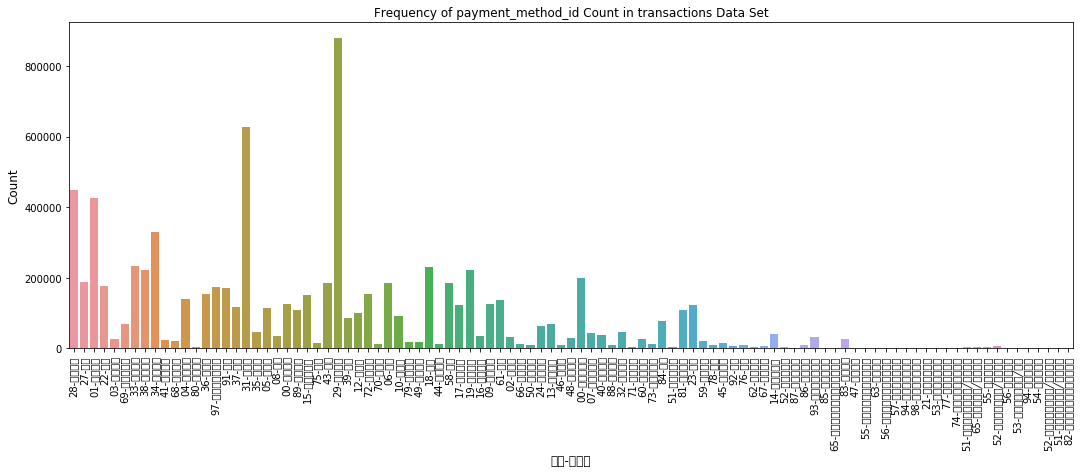

In [17]:
# payment_method_id count in transactions Data Set
plt.figure(figsize=(18,6))
#plt.subplot(311)
sns.countplot(x="品號-品名稱", data=OriginData)
plt.ylabel('Count', fontsize=12)
plt.xlabel('品號-品名稱', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of payment_method_id Count in transactions Data Set", fontsize=12)
plt.show()
#payment_method_id_count = Counter(transactions['payment_method_id']).most_common()
#print("payment_method_id Count " +str(payment_method_id_count))

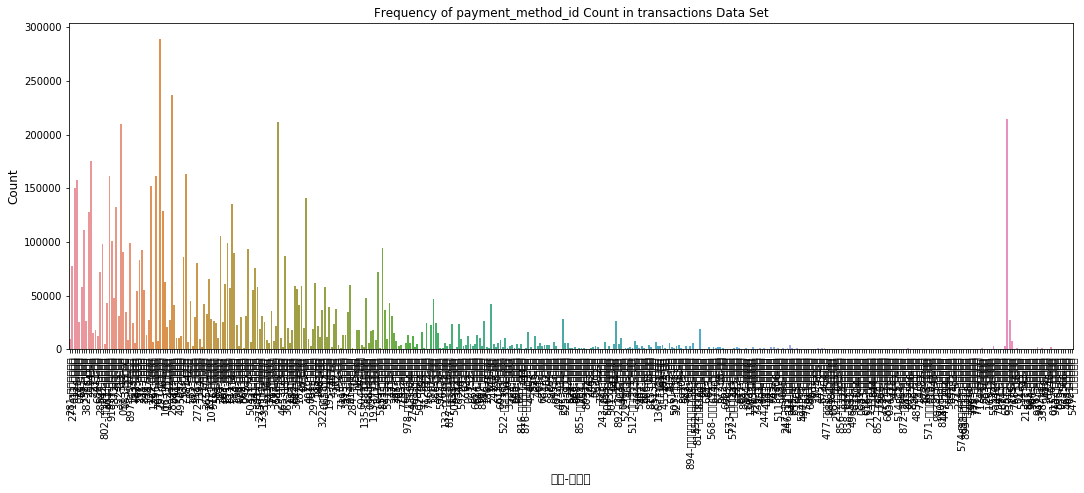

In [19]:
# payment_method_id count in transactions Data Set
plt.figure(figsize=(18,6))
#plt.subplot(311)
sns.countplot(x="群號-群名稱", data=OriginData)
plt.ylabel('Count', fontsize=12)
plt.xlabel('群號-群名稱', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of payment_method_id Count in transactions Data Set", fontsize=12)
plt.show()
#payment_method_id_count = Counter(transactions['payment_method_id']).most_common()
#print("payment_method_id Count " +str(payment_method_id_count))

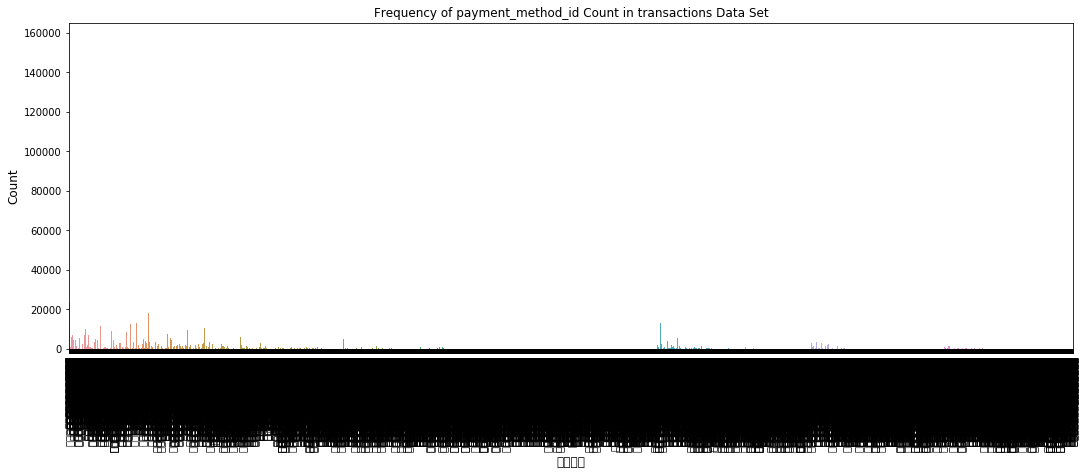

In [20]:

# payment_method_id count in transactions Data Set
plt.figure(figsize=(18,6))
#plt.subplot(311)
sns.countplot(x="單品名稱", data=OriginData)
plt.ylabel('Count', fontsize=12)
plt.xlabel('單品名稱', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of payment_method_id Count in transactions Data Set", fontsize=12)
plt.show()
#payment_method_id_count = Counter(transactions['payment_method_id']).most_common()
#print("payment_method_id Count " +str(payment_method_id_count))

# 依據交易為單筆資料

In [24]:
Q1 = pd.read_csv('data/ALLFAM08_Q1.csv' )
Q2 = pd.read_csv('data/ALLFAM08_Q2.csv' )
Q3 = pd.read_csv('data/ALLFAM08_Q3.csv' )
Q4 = pd.read_csv('data/ALLFAM08_Q4.csv' )
AllMb = pd.read_csv('data/ALLFAM08_AllMb.csv' )

In [25]:
Q1.head()

,TxID,MbID,gender_0F1M,age,date,time_date_minus20161231,time_sec,SUM_of_sells,SUM_of_amount
0,1175820170312075416540251422720,1010002836,0,2,2017-03-12,71,6162986,6,259
1,1175820170226075241005937852416,1010002836,0,2,2017-02-26,57,4953014,7,294
2,1602620170211213419473839063040,1010005476,0,3,2017-02-11,42,3706449,3,178
3,1602620170323222445806170669056,1010005476,0,3,2017-03-23,82,7165934,2,139
4,1602620170213213299183368273920,1010005476,0,3,2017-02-13,44,3879427,1,30


In [96]:
Q1.shape

(808946, 9)

## Date

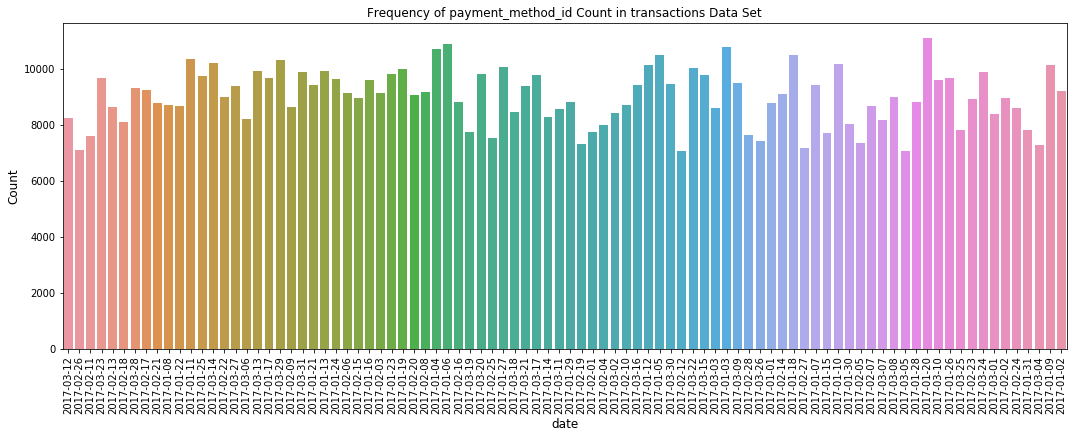

In [28]:
# payment_method_id count in transactions Data Set
plt.figure(figsize=(18,6))
#plt.subplot(311)
sns.countplot(x="date", data=Q1)
plt.ylabel('Count', fontsize=12)
plt.xlabel('date', fontsize=12)
plt.xticks(rotation='vertical')
#plt.title("Frequency of payment_method_id Count in transactions Data Set", fontsize=12)
plt.show()
#payment_method_id_count = Counter(transactions['payment_method_id']).most_common()
#print("payment_method_id Count " +str(payment_method_id_count))

## SUM_of_amount 每筆交易的總價格

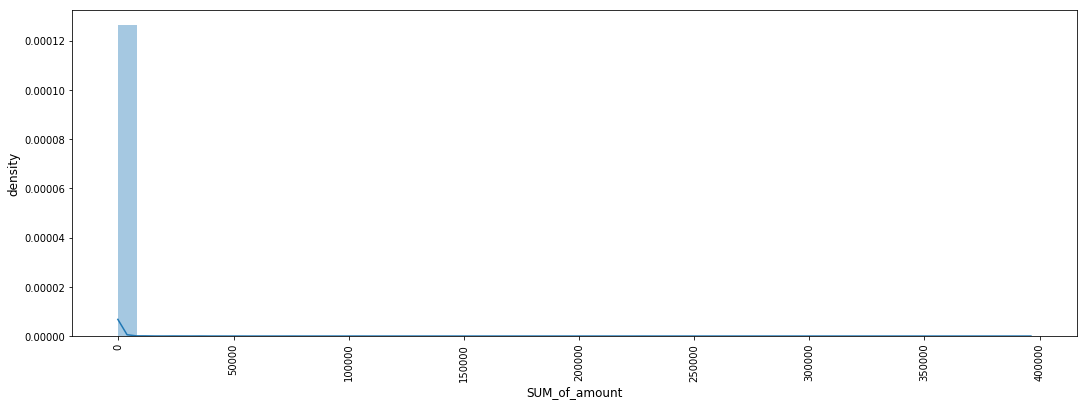

In [167]:
# payment_method_id count in transactions Data Set
plt.figure(figsize=(18,6))
#plt.subplot(311)
sns.distplot(Q1.SUM_of_amount)
plt.ylabel('density', fontsize=12)
plt.xlabel('SUM_of_amount', fontsize=12)
plt.xticks(rotation='vertical')
#plt.title("Frequency of payment_method_id Count in transactions Data Set", fontsize=12)
plt.show()
#payment_method_id_count = Counter(transactions['payment_method_id']).most_common()
#print("payment_method_id Count " +str(payment_method_id_count))

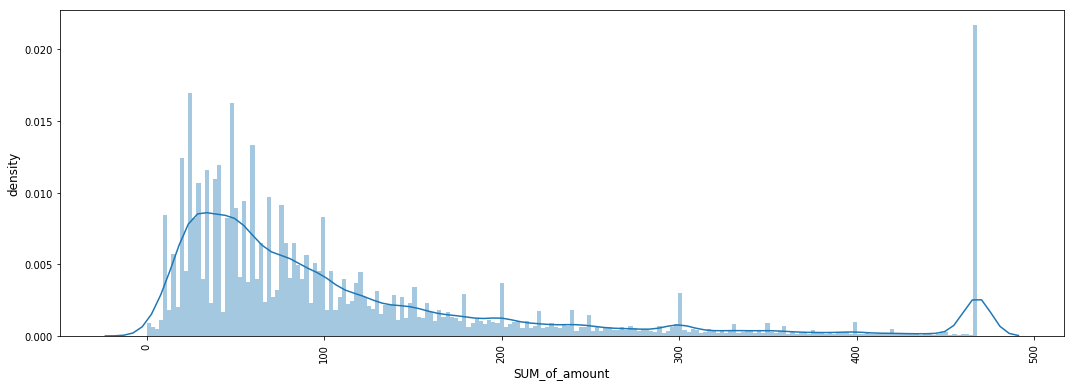

In [71]:
# payment_method_id count in transactions Data Set
plt.figure(figsize=(18,6))
#plt.subplot(311)
clip_temp = Q1.SUM_of_amount.quantile(0.75) +(3*(Q1.SUM_of_amount.quantile(0.75) - Q1.SUM_of_amount.quantile(0.25)))
sns.distplot(Q1.SUM_of_amount.clip(0, clip_temp), bins = 200)
plt.ylabel('density', fontsize=12)
plt.xlabel('SUM_of_amount', fontsize=12)
plt.xticks(rotation='vertical')
#plt.title("Frequency of payment_method_id Count in transactions Data Set", fontsize=12)
plt.show()
#payment_method_id_count = Counter(transactions['payment_method_id']).most_common()
#print("payment_method_id Count " +str(payment_method_id_count))

## SUM_of_sells 每筆交易的售出商品數

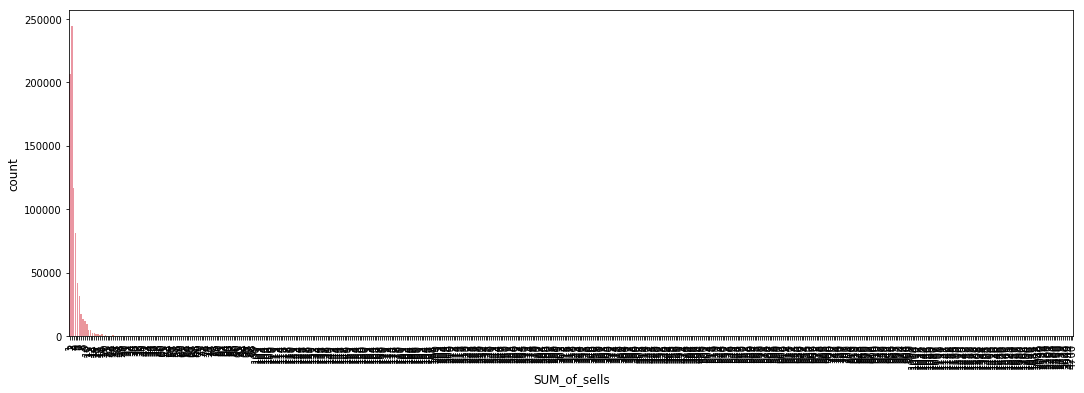

In [46]:
# payment_method_id count in transactions Data Set
plt.figure(figsize=(18,6))
#plt.subplot(311)
sns.countplot(Q1.SUM_of_sells)
plt.ylabel('count', fontsize=12)
plt.xlabel('SUM_of_sells', fontsize=12)
plt.xticks(rotation='vertical')
#plt.title("Frequency of payment_method_id Count in transactions Data Set", fontsize=12)
plt.show()
#payment_method_id_count = Counter(transactions['payment_method_id']).most_common()
#print("payment_method_id Count " +str(payment_method_id_count))

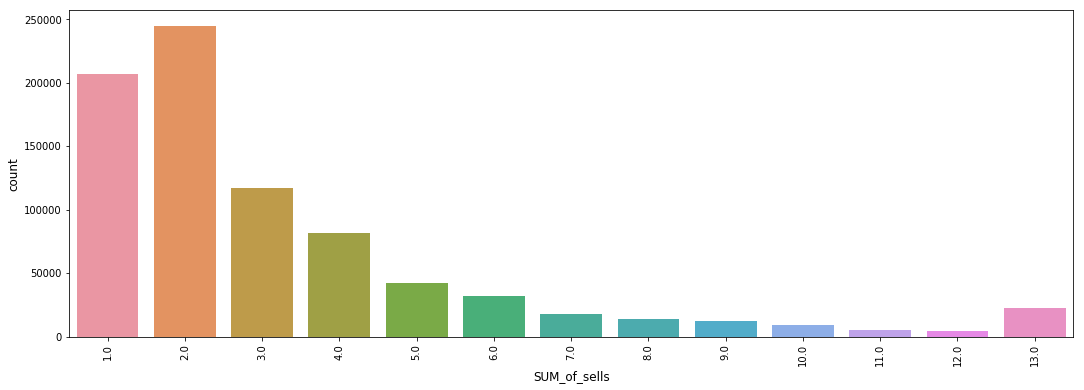

In [72]:
# payment_method_id count in transactions Data Set
plt.figure(figsize=(18,6))
#plt.subplot(311)
clip_temp = Q1.SUM_of_sells.quantile(0.75) +(3*(Q1.SUM_of_sells.quantile(0.75) - Q1.SUM_of_sells.quantile(0.25)))
sns.countplot(Q1.SUM_of_sells.clip(0,clip_temp))
plt.ylabel('count', fontsize=12)
plt.xlabel('SUM_of_sells', fontsize=12)
plt.xticks(rotation='vertical')
#plt.title("Frequency of payment_method_id Count in transactions Data Set", fontsize=12)
plt.show()
#payment_method_id_count = Counter(transactions['payment_method_id']).most_common()
#print("payment_method_id Count " +str(payment_method_id_count))

# 依據會員為單筆資料

In [4]:
Q1_X = pd.read_csv('data/Q1_X_Clipped.csv' )
Q2_Y = pd.read_csv('data/Q2_Y_Clipped.csv' )
Q2_X = pd.read_csv('data/Q2_X_Clipped.csv' )
Q3_Y = pd.read_csv('data/Q3_Y_Clipped.csv' )
Q3_X = pd.read_csv('data/Q3_X_Clipped.csv' )
Q4_Y = pd.read_csv('data/Q4_Y_Clipped.csv' )

In [9]:
Q1_X.shape

(75393, 11)

In [150]:
print("會員總數:",AllMb.shape)
print("該季是否出現過:\n",( Q1_X.F > 0).value_counts())

會員總數: (75393, 3)
該季是否出現過:
 True     44005
False    31388
Name: F, dtype: int64


In [10]:
AllMb.age.value_counts()
#0 >=19
#1 20~29
#2 30~39
#3 40~49
#4 50~59
#5 60<=

2    27209
1    21802
3    16791
0     4869
4     3955
5      767
Name: age, dtype: int64

In [11]:
AllMb.gender.value_counts()

0    48194
1    27199
Name: gender, dtype: int64

In [156]:
Q1_X.head()

,MbID,age,gender_0F1M,R,R_sec,F,F_sd,M,M_sd,Breadth,...,CountMon,CountTue,CountWed,CountThu,CountFri,CountSat,L2,Entropy,LogUtility,C3
0,1010002836,2,0,0.786517,0.781447,0.000461,0.157303,0.000057,0.000137,0.003221,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.463920,0.798416,0.000073,0.010745
1,1010003550,0,0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
2,1010004795,2,0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
3,1010005476,3,0,0.977528,0.975192,0.009691,0.561672,0.000183,0.000526,0.015298,...,0.014563,0.013624,0.009174,0.004762,0.002463,0.006689,0.076155,0.405957,0.003360,0.004076
4,1010005510,1,0,1.000000,0.996285,0.018459,0.587245,0.000413,0.000777,0.050725,...,0.026699,0.013624,0.011468,0.007143,0.024631,0.016722,0.048689,0.300690,0.008252,0.003211


In [76]:
Q2_Y.head()

,MbID,R,R_sec,F,M,R_class01,F_class01,M_class01,R_class012,R_class0123,R_class01234
0,1010002836,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1010003550,60.000000,5243213.000000,6.000000,293.000000,0.000000,1.000000,0.000000,2.000000,3.000000,4.000000
2,1010004795,81.000000,7025805.000000,19.000000,1568.000000,0.000000,1.000000,1.000000,2.000000,3.000000,4.000000
3,1010005476,86.000000,7508351.000000,33.000000,2837.000000,1.000000,1.000000,1.000000,2.000000,3.000000,4.000000
4,1010005510,56.000000,4879174.000000,5.000000,336.000000,0.000000,0.000000,0.000000,2.000000,3.000000,4.000000


In [86]:
Q2_Y.describe()

,MbID,R,R_sec,F,M,R_class01,F_class01,M_class01,R_class012,R_class0123,R_class01234
count,75393.000000,75393.000000,75393.000000,75393.000000,75393.000000,75393.000000,75393.000000,75393.000000,75393.000000,75393.000000,75393.000000
mean,1082329274.556206,49.599379,4294669.831350,11.857692,1839.489793,0.350192,0.370446,0.341093,1.359622,2.041516,2.723409
std,39069689.451782,38.324564,3368050.135191,28.526072,40907.041930,0.477033,0.482927,0.474080,0.930870,1.395871,1.861244
min,1010002836.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1052019687.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1071416068.000000,64.000000,5598825.000000,2.000000,225.000000,0.000000,0.000000,0.000000,2.000000,3.000000,4.000000
75%,1120530446.000000,87.000000,7598255.000000,11.000000,1118.000000,1.000000,1.000000,1.000000,2.000000,3.000000,4.000000
max,1143990826.000000,91.000000,7948761.000000,1145.000000,9909672.000000,1.000000,1.000000,1.000000,2.000000,3.000000,4.000000


## R

In [178]:
Q2_Y.R.describe()

count   75393.000000
mean       49.599379
std        38.324564
min         1.000000
25%         1.000000
50%        64.000000
75%        87.000000
max        91.000000
Name: R, dtype: float64

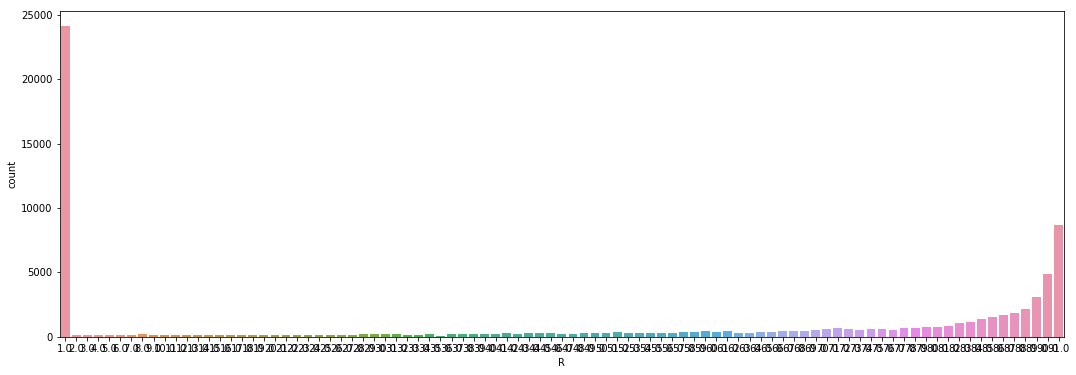

In [172]:
# payment_method_id count in transactions Data Set
plt.figure(figsize=(18,6))
#plt.subplot(311)
clip_temp = Q2_Y.R.quantile(0.75) +(3*(Q2_Y.R.quantile(0.75) - Q2_Y.R.quantile(0.25)))
sns.countplot(Q2_Y.R)

#以下r=1數量太多，應該是處理有問題

## R Clipped data

In [5]:
Q2_Y.R.describe()

count    75393.000000
mean        78.228960
std         21.047762
min          1.000000
25%         74.000000
50%         89.000000
75%         91.000000
max         91.000000
Name: R, dtype: float64

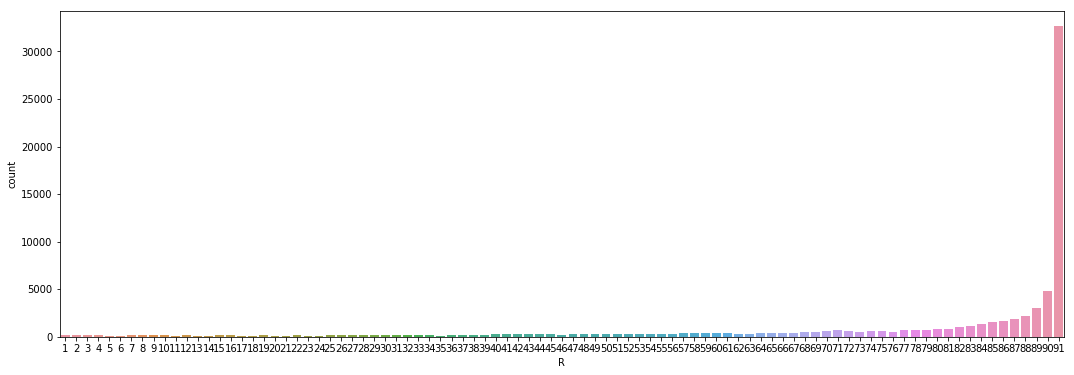

In [6]:
# payment_method_id count in transactions Data Set
plt.figure(figsize=(18,6))
#plt.subplot(311)
clip_temp = Q2_Y.R.quantile(0.75) +(3*(Q2_Y.R.quantile(0.75) - Q2_Y.R.quantile(0.25)))
sns.countplot(Q2_Y.R)

## F

In [177]:
Q2_Y.F.describe()

count   75393.000000
mean       11.857692
std        28.526072
min         0.000000
25%         0.000000
50%         2.000000
75%        11.000000
max      1145.000000
Name: F, dtype: float64

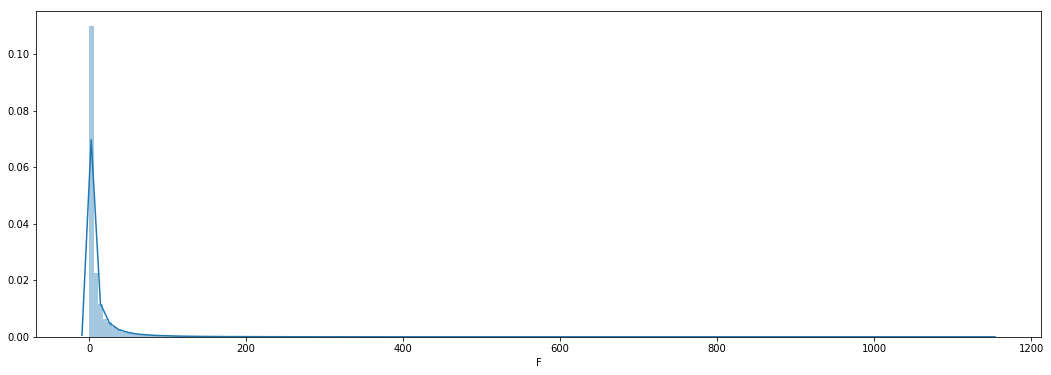

In [163]:
# payment_method_id count in transactions Data Set
plt.figure(figsize=(18,6))
#plt.subplot(311)
clip_temp = Q2_Y.F.quantile(0.75) +(3*(Q2_Y.F.quantile(0.75) - Q2_Y.F.quantile(0.25)))
sns.distplot(Q2_Y.F, bins = 200)

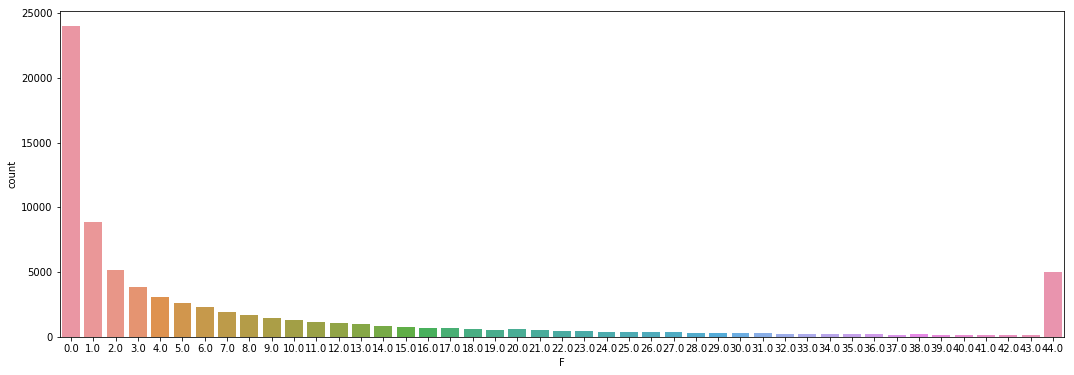

In [164]:
# payment_method_id count in transactions Data Set
plt.figure(figsize=(18,6))
#plt.subplot(311)
clip_temp = Q2_Y.F.quantile(0.75) +(3*(Q2_Y.F.quantile(0.75) - Q2_Y.F.quantile(0.25)))
sns.countplot(Q2_Y.F.clip(0, clip_temp))

## M

In [176]:
Q2_Y.M.describe()

count     75393.000000
mean       1839.489793
std       40907.041930
min           0.000000
25%           0.000000
50%         225.000000
75%        1118.000000
max     9909672.000000
Name: M, dtype: float64

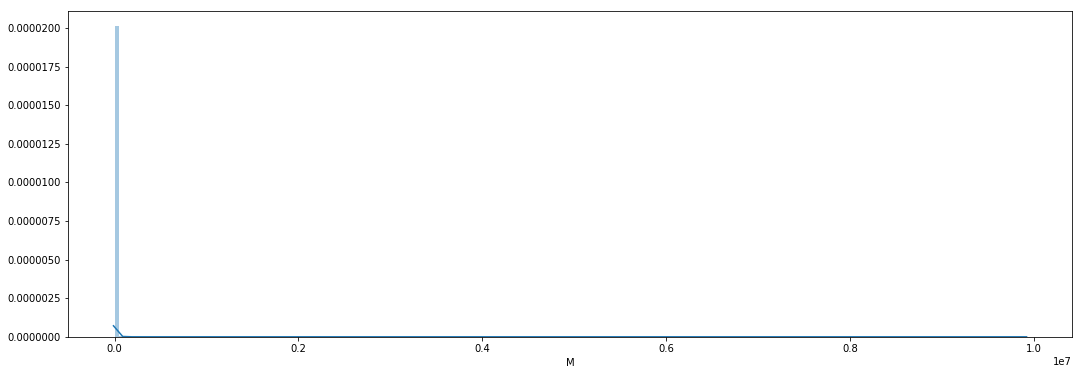

In [166]:
# payment_method_id count in transactions Data Set
plt.figure(figsize=(18,6))
#plt.subplot(311)
clip_temp = Q2_Y.M.quantile(0.75) +(3*(Q2_Y.M.quantile(0.75) - Q2_Y.M.quantile(0.25)))
sns.distplot(Q2_Y.M, bins = 200)

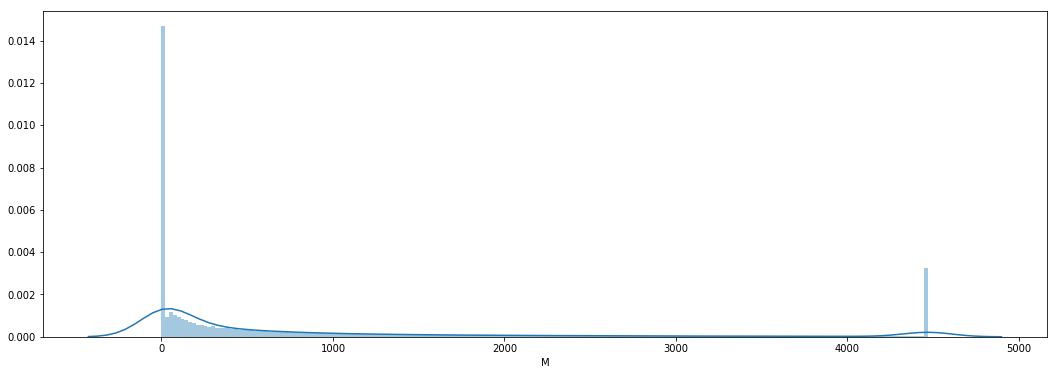

In [165]:
# payment_method_id count in transactions Data Set
plt.figure(figsize=(18,6))
#plt.subplot(311)
clip_temp = Q2_Y.M.quantile(0.75) +(3*(Q2_Y.M.quantile(0.75) - Q2_Y.M.quantile(0.25)))
sns.distplot(Q2_Y.M.clip(0, clip_temp), bins = 200)

## Breadth

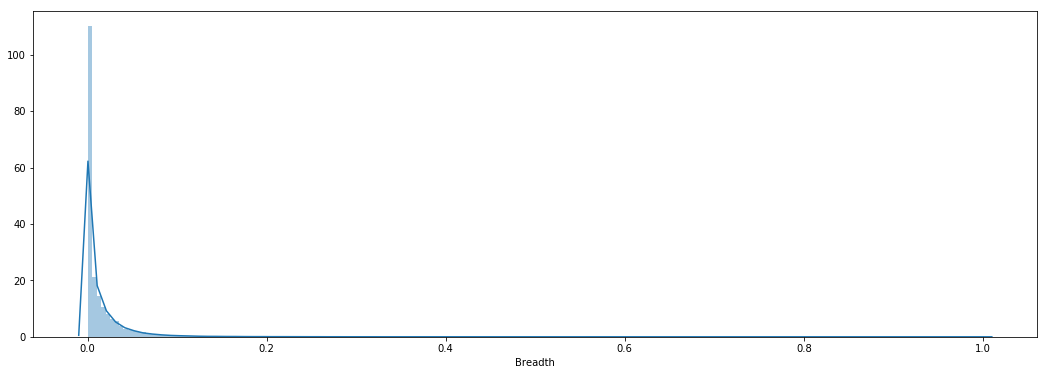

In [173]:
# payment_method_id count in transactions Data Set
plt.figure(figsize=(18,6))
#plt.subplot(311)
clip_temp = Q2_X.Breadth .quantile(0.75) +(3*(Q2_X.Breadth.quantile(0.75) - Q2_X.Breadth.quantile(0.25)))
sns.distplot(Q2_X.Breadth, bins = 200)

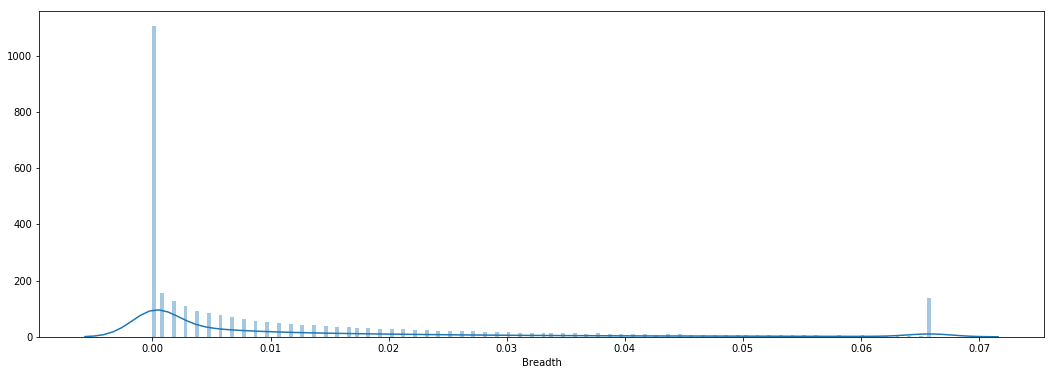

In [174]:
# payment_method_id count in transactions Data Set
plt.figure(figsize=(18,6))
#plt.subplot(311)
clip_temp = Q2_X.Breadth .quantile(0.75) +(3*(Q2_X.Breadth.quantile(0.75) - Q2_X.Breadth.quantile(0.25)))
sns.distplot(Q2_X.Breadth.clip(0,clip_temp), bins = 200)

## Item

In [7]:
Q1_Item_2000 = pd.read_csv('data/Q1_Item_2000.csv' )
Q2_Item_2000 = pd.read_csv('data/Q2_Item_2000.csv' )
Q3_Item_2000 = pd.read_csv('data/Q3_Item_2000.csv' )

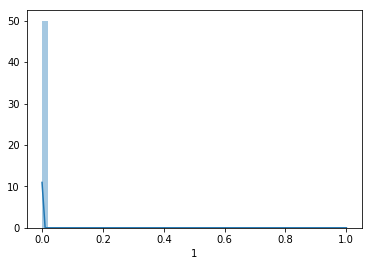

In [14]:
sns.distplot(Q1_Item_2000["1"])

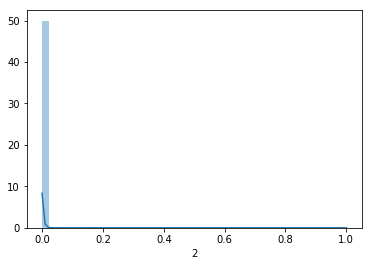

In [15]:
sns.distplot(Q1_Item_2000["2"])

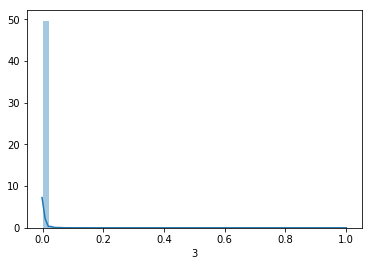

In [16]:
sns.distplot(Q1_Item_2000["3"])

count    75393.000000
mean         0.000024
std          0.004004
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: 4, dtype: float64


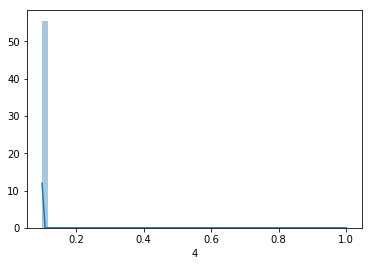

In [22]:
print(Q1_Item_2000["4"].describe())
sns.distplot(Q1_Item_2000["4"].clip(0.01,0.1))